In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [ ]:
df = pd.read_csv('combined.csv')
df=df.dropna()
def leaseconv(str1):
  yr=int(str1[:1])
  return yr
df['remaining_lease']=df['remaining_lease'].apply(lambda x: leaseconv(x))

In [ ]:
df.dtypes

,0
latitude,float64
longitude,float64
blk_no,object
road_name,object
postal_code,object
address,object
cbd_dist,float64
min_dist_mrt,float64
month,object
town,object


In [ ]:
df.isnull().sum()

,0
latitude,0
longitude,0
blk_no,0
road_name,0
postal_code,0
address,0
cbd_dist,0
min_dist_mrt,0
month,0
town,0


# Minor Data Preprocessing for Combined Data

In [ ]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median
df['storey_range']=df['storey_range'].astype(str)
df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
def leaseconv(str1):
  yr=int(str1[:1])
  return yr
df.isnull().sum()

,0
latitude,0
longitude,0
blk_no,0
road_name,0
postal_code,0
address,0
cbd_dist,0
min_dist_mrt,0
month,0
town,0


In [ ]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','remaining_lease','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,remaining_lease,storey_median,resale_price
0,2715.822202,457.092359,68.0,7,5.0,56000.0
1,2715.822202,457.092359,68.0,7,11.0,46000.0
2,2715.822202,457.092359,74.0,7,8.0,53800.0
3,2715.822202,457.092359,68.0,7,8.0,45000.0
4,2715.822202,457.092359,68.0,7,17.0,55000.0
...,...,...,...,...,...,...
936262,2525.251132,182.864524,112.0,9,23.0,1325000.0
936263,2525.251132,182.864524,112.0,9,20.0,1400000.0
936264,2525.251132,182.864524,92.0,9,26.0,1188000.0
936265,2525.251132,182.864524,112.0,9,35.0,1588000.0


In [ ]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,remaining_lease,storey_median,resale_price
0,2715.822202,457.092359,68.0,7,5.0,56000.0
1,2715.822202,457.092359,68.0,7,11.0,46000.0
2,2715.822202,457.092359,74.0,7,8.0,53800.0
3,2715.822202,457.092359,68.0,7,8.0,45000.0
4,2715.822202,457.092359,68.0,7,17.0,55000.0
...,...,...,...,...,...,...
936262,2525.251132,182.864524,112.0,9,23.0,1325000.0
936263,2525.251132,182.864524,112.0,9,20.0,1400000.0
936264,2525.251132,182.864524,92.0,9,26.0,1188000.0
936265,2525.251132,182.864524,112.0,9,35.0,1588000.0


# Checking and Handling for Skewness in the Data

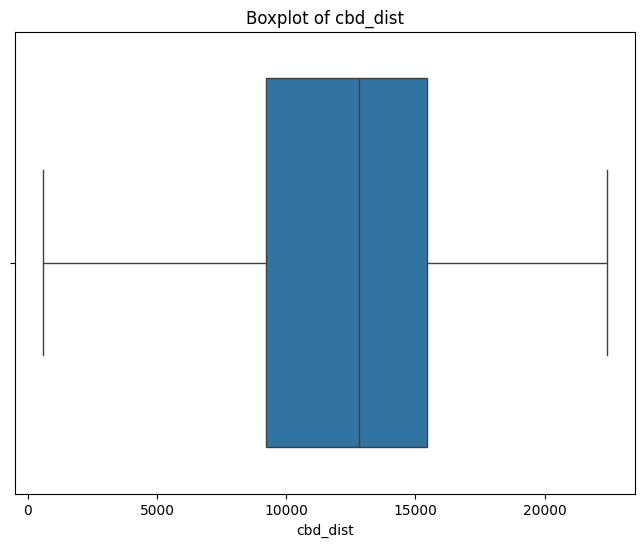

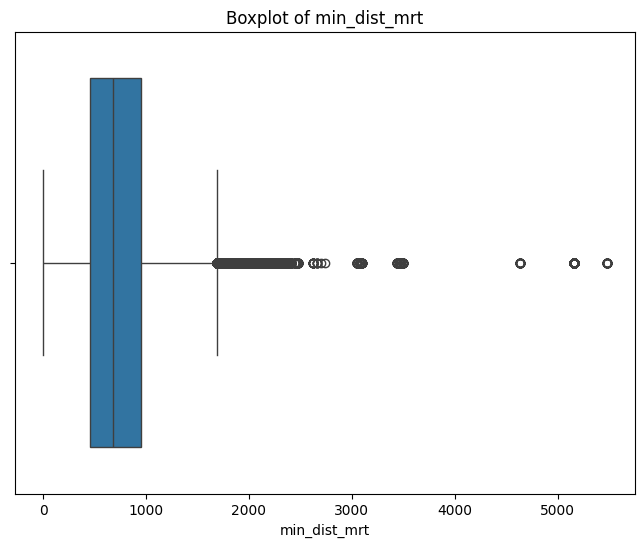

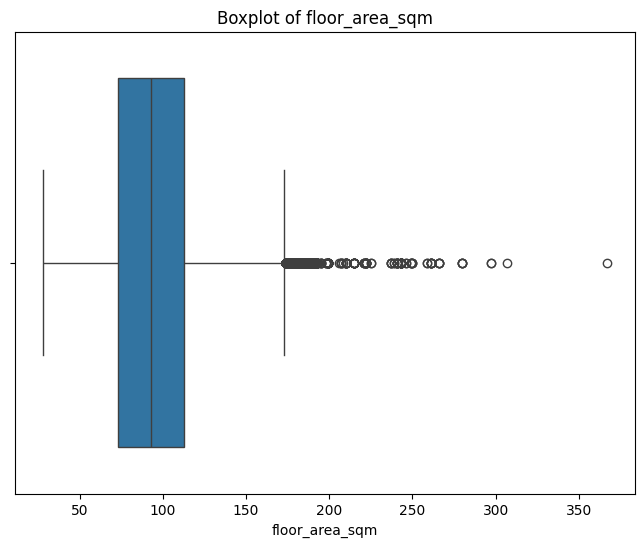

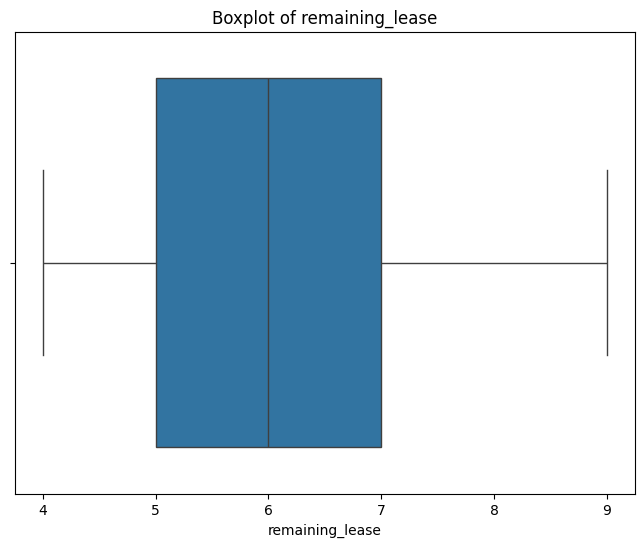

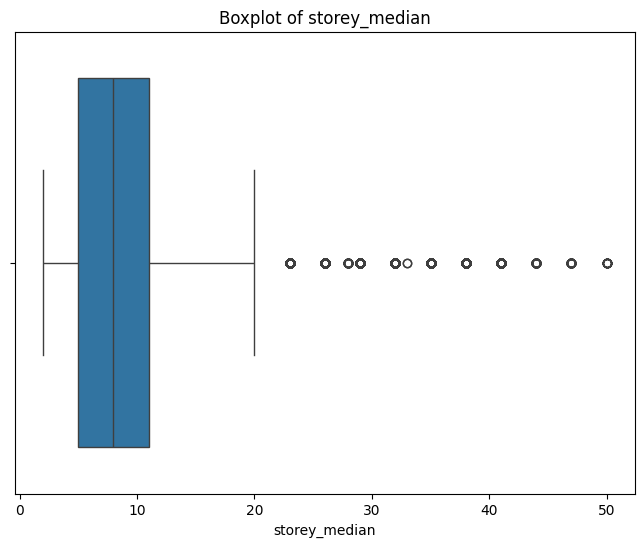

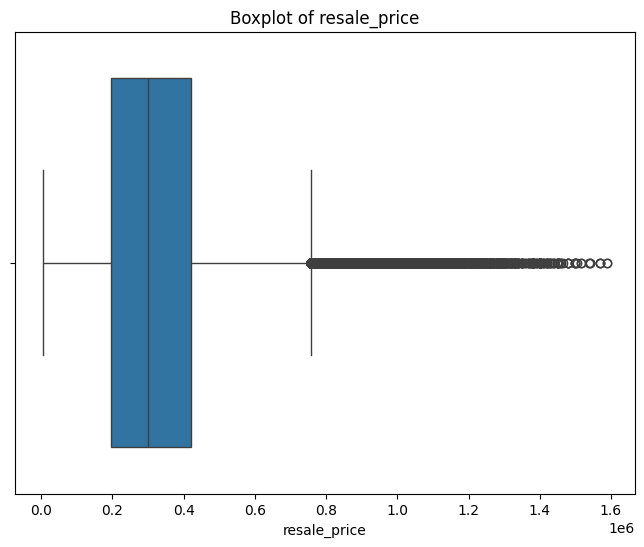

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','remaining_lease','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [ ]:
df1 = scope_df

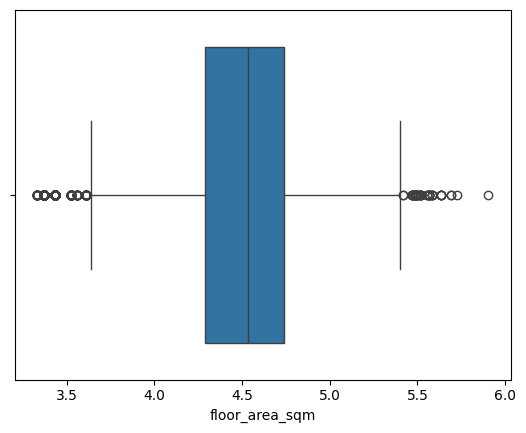

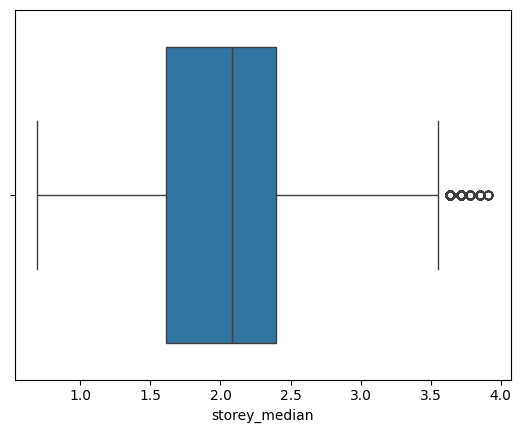

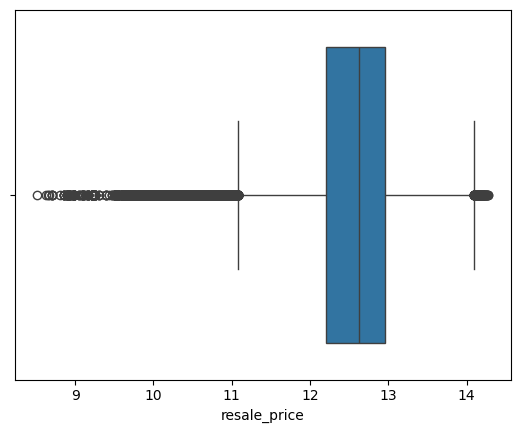

In [ ]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great
                                                                # effect on the data, so no need to apply for that columns

df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [ ]:
df1.dtypes

,0
cbd_dist,float64
min_dist_mrt,float64
floor_area_sqm,float64
remaining_lease,int64
storey_median,float64
resale_price,float64


# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

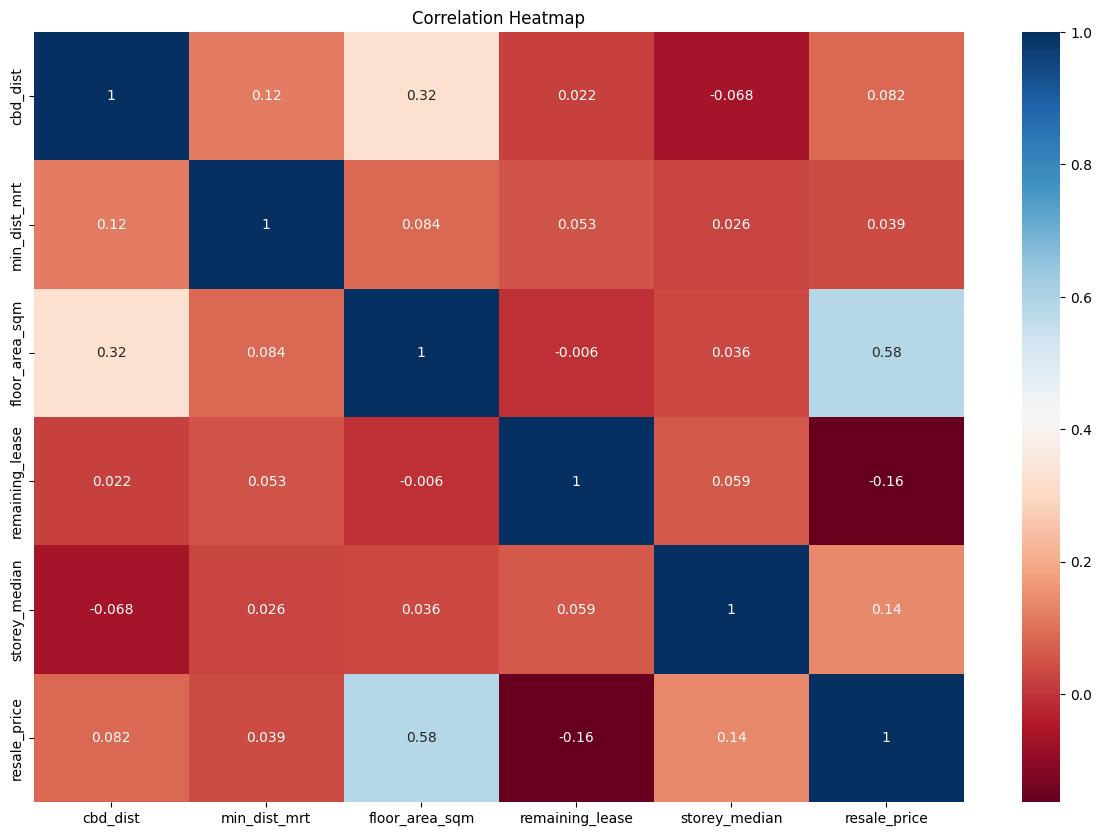

In [ ]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix,
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu',
    annot=True
)

# Encoding Data

In [ ]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','remaining_lease','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-2.139282,-0.720029,-1.132346,0.815879,-0.321260
1,-2.139282,-0.720029,-1.132346,0.815879,0.823536
2,-2.139282,-0.720029,-0.824243,0.815879,0.361159
3,-2.139282,-0.720029,-1.132346,0.815879,0.361159
4,-2.139282,-0.720029,-1.132346,0.815879,1.455594
...,...,...,...,...,...
902053,-2.182536,-1.399871,0.685838,2.765664,1.894489
902054,-2.182536,-1.399871,0.685838,2.765664,1.691563
902055,-2.182536,-1.399871,-0.030919,2.765664,2.072501
902056,-2.182536,-1.399871,0.685838,2.765664,2.504094


# Splitting the Data for Training and Testing Purposes

In [ ]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 3}
 
Mean squared error: 0.0942433686887536
Mean Absolute Error 0.21284042886463492
Root Mean squared error: 0.30699082834631003
 
R-squared: 0.7398141684817314


# Testing Our Trained Model (Decision Tree Regressor)

In [ ]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

352038.86319711

In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)